# GERMAN DATASET WITH TENSORFLOW

VAMOS A IMPLEMENTAR EL SIGUIENTE MODELO:  
LINEAR --> RELU 
Una única capa de 43 nodos igual al número de categorias

Las referencias utilizadas para esta hoja son:
+ Curso de deep neural networks de Andrw NG
+ Artículo sobre reconocimiento de imágenes de Walled Abdulla

## PREPARANDO EL DATASET

El primer paso es preparar el DATASET para poder aplicar el DataFrame Tensorflow en el.

In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import csv

# Allow image embeding in notebook
%matplotlib inline

In [2]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]

    labels = []
    images = []
    #print(directories)
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    
    #print(label_dir)
    return images, labels

In [3]:
train_data_dir = ".\\data\\Training"            
X_train_orig, Y_train_orig = load_data(train_data_dir)
#print(Y_train_orig)

In [4]:
def load_test_data (data_dir):
    labels  = []
    labels2 =[]
    images = []
    
    with open('GT-final_test.csv', 'r') as f:
      reader = csv.reader(f)
      labels = list(reader)
    #print(labels)
    for d in range(1,len(labels)):
        labels2.append(int(labels[d][0]))
    #print(len(labels))
    
    file_names = [os.path.join(data_dir, f) 
                  for f in os.listdir(data_dir) if f.endswith(".ppm")]
    for f in file_names:
        images.append(skimage.data.imread(f))
    
    return images,labels2

In [5]:
test_data_dir = ".\\data\\Testing" 
X_test_orig, Y_test_orig = load_test_data(test_data_dir)

In [6]:
print("ARRAY DE LABELS TRAIN")
print("Tipo de objeto Python: " , type(Y_train_orig))
print("Número de imágenes totales: ", len(Y_train_orig))
print("Número de clases totales: ", len(set(Y_train_orig)))

ARRAY DE LABELS TRAIN
Tipo de objeto Python:  <class 'list'>
Número de imágenes totales:  39209
Número de clases totales:  43


In [7]:
print("ARRAY DE IMÁGENES TRAIN")
print("Tipo de objeto Python: ",type(X_train_orig))
print("Número de imágenes totales: ",len(X_train_orig))
print("Dimensiones de la primera imagen: ", X_train_orig[0].shape)
print("Parámetros RGB del primer pixel: ", X_train_orig[0][0][0])

ARRAY DE IMÁGENES TRAIN
Tipo de objeto Python:  <class 'list'>
Número de imágenes totales:  39209
Dimensiones de la primera imagen:  (30, 29, 3)
Parámetros RGB del primer pixel:  [75 78 80]


In [8]:
print("ARRAY DE LABELS TEST")
print("Tipo de objeto Python: " , type(Y_test_orig))
print("Número de imágenes totales: ", len(Y_test_orig))
print("Número de clases totales: ", len(set(Y_test_orig)))

ARRAY DE LABELS TEST
Tipo de objeto Python:  <class 'list'>
Número de imágenes totales:  12630
Número de clases totales:  43


In [9]:
print("ARRAY DE IMÁGENES TEST")
print("Tipo de objeto Python: ",type(X_test_orig))
print("Número de imágenes totales: ",len(X_test_orig))
print("Dimensiones de la primera imagen: ", X_test_orig[0].shape)
print("Parámetros RGB del primer pixel: ", X_test_orig[0][0][0])

ARRAY DE IMÁGENES TEST
Tipo de objeto Python:  <class 'list'>
Número de imágenes totales:  12630
Dimensiones de la primera imagen:  (54, 53, 3)
Parámetros RGB del primer pixel:  [115 138 173]


Hasta aquí todo parece normal.  
Faltaria redimensionar todas las imágenes a 32X32

In [10]:
def prepare_X(X_train):
    
    # Resize and normalizing (RGB) images
    X_32 = [skimage.transform.resize(image, (32, 32))
                for image in X_train]
    #print('X_32[0].shape',X_32[0].shape)
    #print('32*32*3 =',32*32*3)
    
    
    #convertimos la lista a un array nd
    X_nd = np.array(X_32)
     
    
    #pasamos de un array de 4 dimensiones a uno de 2
    X_flatt = X_nd.reshape(X_nd.shape[0], -1).T
    
    return X_flatt

In [11]:
#COMPROBAMOS QUE LAS DIMENSIONES SEAN CORRECTAS
X_train=prepare_X(X_train_orig)
print('len(X_train_orig): ',len(X_train_orig))
print('32*32*3 =',32*32*3)
print('X_train.shape: ',X_train.shape)
X_test=prepare_X(X_test_orig)
print('tenemos 39209 imágnes de 3072 pixeles --> CORRECTO \n')
print('len(X_test_orig): ',len(X_test_orig))
print('32*32*3 =',32*32*3)
print('X-test.shape: ',X_test.shape)
print('tenemos 12630 imágnes de 3072 pixeles --> CORRECTO')

D:\ANACONDA\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


len(X_train_orig):  39209
32*32*3 = 3072
X_train.shape:  (3072, 39209)
tenemos 39209 imágnes de 3072 pixeles --> CORRECTO 

len(X_test_orig):  12630
32*32*3 = 3072
X-test.shape:  (3072, 12630)
tenemos 12630 imágnes de 3072 pixeles --> CORRECTO


In [12]:
def prepare_Y(Y, C):
    
    #convertimos a una matriz de one hot
    Z=np.zeros((len(Y),C))
    for i in range(len(Y)):
        Z[i,Y[i]] = 1
    return Z.T

In [13]:
#COMPROBAMOS QUE LAS DIMENSIONES SEAN CORRECTAS
Y_train=prepare_Y(Y_train_orig,len(set(Y_train_orig)))
print('len(Y_train_orig): ',len(Y_train_orig))
print('Y_train.shape: ',Y_train.shape)
print('tenemos 43 categorias y 39209 imágenes --> CORRECTO\n')
Y_test=prepare_Y(Y_test_orig,len(set(Y_train_orig)))
print('len(Y_test_orig): ',len(Y_test_orig))
print('Y_test.shape: ',Y_test.shape)
print('tenemos 43 categorias y 12630 imágenes --> CORRECTO')

len(Y_train_orig):  39209
Y_train.shape:  (43, 39209)
tenemos 43 categorias y 39209 imágenes --> CORRECTO

len(Y_test_orig):  12630
Y_test.shape:  (43, 12630)
tenemos 43 categorias y 12630 imágenes --> CORRECTO


## MODELO WALLED ABDULLA

In [ ]:
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

In [ ]:
parametros_iniciales={"n_x":len(X_train),
                      "n_y":len(Y_train),
                      "m":len(X_train[0]),
                      "L1":43}

## MODELO

In [14]:
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

D:\ANACONDA\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [15]:
parametros_iniciales={"n_x":len(X_train),
                      "n_y":len(Y_train),
                      "m":len(X_train[0]),
                      "L1":43}

In [16]:

def create_placeholders(parametros_iniciales):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    parameters -- Python dictionary containing:
        n_x -- scalar, size of an image vector (num_px * num_px = 32*32 * 3 = 12288)
        n_y -- scalar, number of classes (from 0 to 62, so -> 62)
        l1 -- scalar, dimension of the first layer
        L2 -- scalar, dimension of the second layer
        L3 -- scalar, dimension of the third layer
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    n_x=parametros_iniciales["n_x"]
    n_y=parametros_iniciales["n_y"]
    
    X = tf.placeholder(tf.float32,shape=[n_x,None],name='X')
    Y = tf.placeholder(tf.float32,shape=[n_y,None],name='Y')

 
    return X, Y

In [17]:
X, Y = create_placeholders(parametros_iniciales)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X:0", shape=(3072, ?), dtype=float32)
Y = Tensor("Y:0", shape=(43, ?), dtype=float32)


In [18]:
def initialize_parameters(parametros_iniciales):
    """
    Arguments:
    parametros_inicales -- Python dictionary containing:
        n_x -- scalar, size of an image vector (num_px * num_px = 32*32 * 3 = 3072)
        n_y -- scalar, number of classes (from 0 to 62, so -> 62)
        L1 -- scalar, dimension of the first layer

    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1
    """
    
    #tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    n_x=parametros_iniciales["n_x"]
    n_y=parametros_iniciales["n_y"]
    L1=parametros_iniciales["L1"]

    
    
    
    W1 = tf.get_variable("W1", [L1,n_x], initializer = tf.contrib.layers.xavier_initializer(seed = None))
    b1 = tf.get_variable("b1", [L1,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1}
    
    return parameters

In [19]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters(parametros_iniciales)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))

W1 = <tf.Variable 'W1:0' shape=(43, 3072) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(43, 1) dtype=float32_ref>


In [20]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']

                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X),b1)                        # Z1 = np.dot(W1, X) + b1
    #A1 = tf.nn.relu(Z1)
    
    #Implement the forward pass of the neural network. We commented for you the numpy equivalents
    #so that you can compare the tensorflow implementation to numpy. It is important to note that
    #the forward propagation stops at z3. The reason is that in tensorflow the last linear layer output
    #is given as input to the function computing the loss. Therefore, you don't need a3!
    
    return Z1

In [21]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(parametros_iniciales)
    parameters = initialize_parameters(parametros_iniciales)
    Z1 = forward_propagation(X, parameters)
    print("Z1 = " + str(Z1))

Z1 = Tensor("Add:0", shape=(43, ?), dtype=float32)


In [22]:
def compute_cost(Z1, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    #It is important to know that the "logits" and "labels" inputs of tf.nn.softmax_cross_entropy_with_logits
    #are expected to be of shape (number of examples, num_classes). We have thus transposed Z3 and Y for you
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z1)
    labels = tf.transpose(Y)
    

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits,  labels = labels))
    
    #print('logits',logits)
    #print('labels',labels)
    
      
    return cost

In [23]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(parametros_iniciales)
    parameters = initialize_parameters(parametros_iniciales)
    Z1 = forward_propagation(X, parameters)
    cost = compute_cost(Z1, Y)

    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [24]:
def model(X_train, Y_train, X_test, Y_test, parametros_iniciales, learning_rate = 0.001,
          num_epochs = 300, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    #tf.set_random_seed(1)                             # to keep consistent results
    #seed = 3                                          # to keep consistent results
    n_x= parametros_iniciales["n_x"]                          # (n_x: input size, m : number of examples in the train set)
    n_y = parametros_iniciales["n_y"]                            # n_y : output size
    m=parametros_iniciales["m"]
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(parametros_iniciales)

    # Initialize parameters
    parameters = initialize_parameters(parametros_iniciales)
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    A1 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(A1, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()
    #print('Y_train.shape',Y_train.shape)
    #print('X_train.shape',X_train.shape)

    # Start the session to compute the tensorflow graph
    
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            #seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                #print(minibatch_X.shape)
                #print(minibatch_Y.shape)
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(A1), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        

        
        return parameters

### DATASET COMPLETO

Ejecutamos el modelo con el dataset completo.

Cost after epoch 0: 1.720067
Cost after epoch 100: 0.061607
Cost after epoch 200: 0.030607


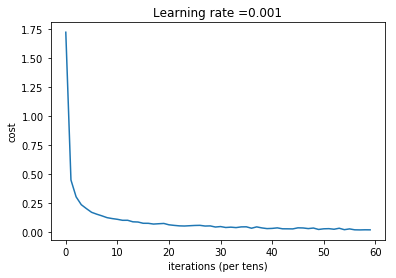

Parameters have been trained!
Train Accuracy: 0.9930373
Test Accuracy: 0.849327


In [29]:
parameters = model(X_train, Y_train, X_test, Y_test, parametros_iniciales)

Le cuesta mucho calcularlo y no conseguimos gran accuracy

Cost after epoch 0: 29.720930
Cost after epoch 100: 4.405582


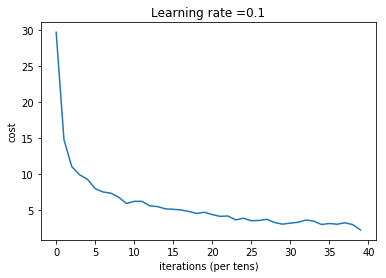

Parameters have been trained!
Train Accuracy: 0.97197074
Test Accuracy: 0.8442597


In [28]:
parameters = model(X_train, Y_train, X_test, Y_test, parametros_iniciales, learning_rate = 0.1, num_epochs = 200, minibatch_size = 32)